## skip-gram모델 구현

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 299 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 300 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 301 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 302 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 303 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 304 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 305 |  반복 1 / 2 | 시간 0[s] | 손실 2.24
| 에폭 306 |  반복 1 / 2 | 시간 0[s] | 손실 1.99
| 에폭 307 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 308 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 309 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 310 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 311 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 312 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 313 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 314 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 315 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 316 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 317 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 318 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 319 |  반복 1 / 2 | 시간 0[s] | 손실 2.63
| 에폭 320 |  반복 1 / 2 | 시간 0[s] | 손실 2.21
| 에폭 321 |  반복 1 / 2 | 시간 0[s] | 손실 2.18
| 에폭 322 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 323 |  반복 1

| 에폭 645 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 646 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 1.96
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 651 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 652 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 1.72
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 1.72
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 657 |  반복 1 / 2 | 시간 0[s] | 손실 1.73
| 에폭 658 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 659 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 660 |  반복 1 / 2 | 시간 0[s] | 손실 1.73
| 에폭 661 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 662 |  반복 1 / 2 | 시간 0[s] | 손실 1.92
| 에폭 663 |  반복 1 / 2 | 시간 0[s] | 손실 1.73
| 에폭 664 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 665 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 666 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 1.73
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 1.71
| 에폭 669 |  반복 1

| 에폭 948 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 949 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 950 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 951 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 952 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 953 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 954 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 955 |  반복 1 / 2 | 시간 1[s] | 손실 1.65
| 에폭 956 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 957 |  반복 1 / 2 | 시간 1[s] | 손실 1.44
| 에폭 958 |  반복 1 / 2 | 시간 1[s] | 손실 2.35
| 에폭 959 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 960 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 961 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 962 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 963 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 964 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 965 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 966 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 967 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 968 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 969 |  반복 1 / 2 | 시간 1[s] | 손실 2.12
| 에폭 970 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 971 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 972 |  반복 1

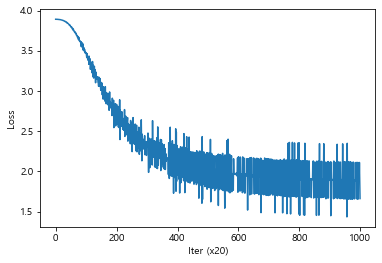

you [-0.00365269  0.0145265   0.00261913 -0.00814855  0.00125903]
say [ 1.0093521  1.0563693  0.8977783 -0.8999807 -0.9098005]
goodbye [-0.7970184  -1.0936708  -0.80909175  0.8089945   0.7933219 ]
and [ 0.9555802  -1.3984262   0.94389594 -0.9686536  -0.969362  ]
i [-0.807818  -1.0939467 -0.7946192  0.8073604  0.7913645]
hello [-0.946342    1.4500233  -0.8885419   0.8937386   0.91205734]
. [-0.00643764 -0.01150227  0.00289359  0.00015598  0.0061322 ]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])